In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [119]:
df_prices = pd.read_csv("nehnutelosti_lamac_dubravka_karlovka.csv")
df_prices["date"] = pd.to_datetime(df_prices["date"])
df_prices = df_prices.loc[df_prices["price"]>100]
df_prices = df_prices.loc[df_prices["price"]<600000]

In [120]:
df_prices["days_since_start"] = 1+(df_prices["date"]-df_prices.date.min())/ np.timedelta64(1, 'D')

In [121]:
df_prices_copy = df_prices.copy()
df_prices_copy["days_since_start"] += 1 
df_prices_test = pd.concat([df_prices, df_prices_copy])

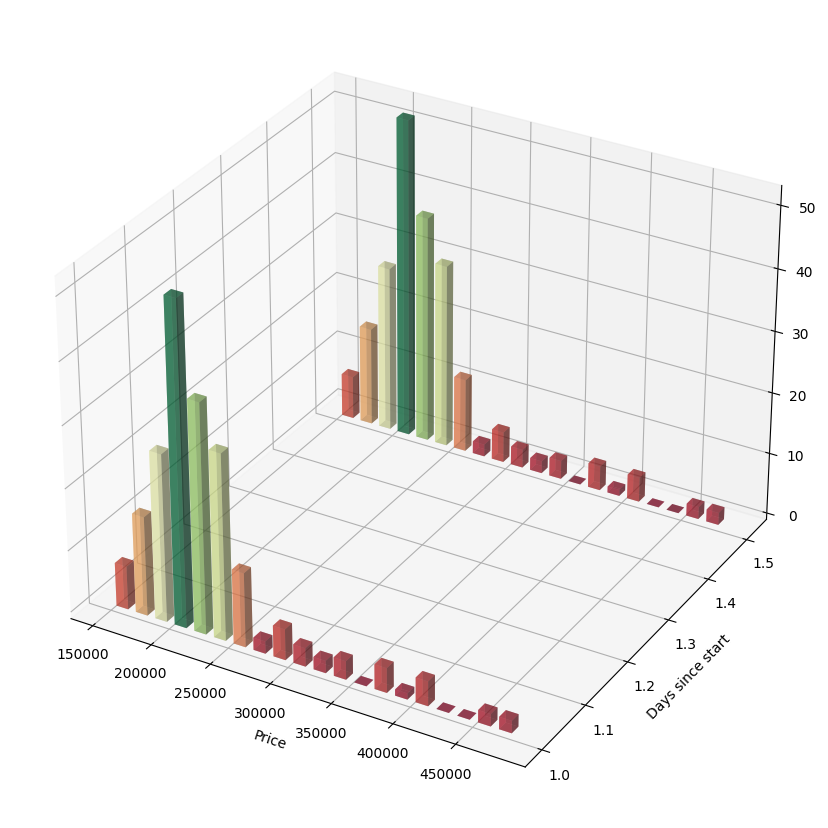

In [124]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')
x, y = df_prices_test["price"], df_prices_test["days_since_start"]
# hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])
hist, xedges, yedges = np.histogram2d(x, y, bins=[20,2])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dy = 0.015
dx = 10000
dz = hist.ravel()

cmap = cm.get_cmap('RdYlGn') # Get desired colormap
max_height = np.max(dz)   # get range of colorbars
min_height = np.min(dz)

# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz]

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=rgba, alpha=0.5)
ax.set_xlabel('Price')
ax.set_ylabel('Days since start')
# plt.tight_layout()
plt.show()

fig.savefig('price_dist_over_time.png', bbox_inches='tight', dpi=199)